# Week 2

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [6]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [7]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("Missing values:\n", df.isnull().sum())

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Correlation Heatmap

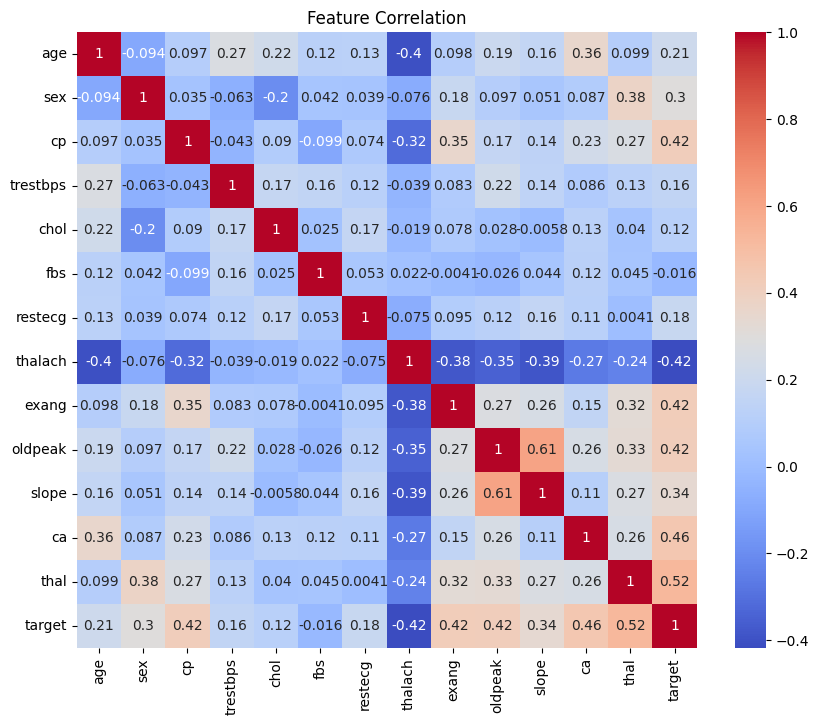

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ridge Regression

In [18]:
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
ridge_pred = ridge_cv.predict(X_test_scaled)

print("\nRidge Regression")
print("Best Alpha:", ridge_cv.alpha_)
print("R² Score:", r2_score(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))


Ridge Regression
Best Alpha: 70.54802310718645
R² Score: 0.5254107228724141
RMSE: 0.3358395337118282


Lasso Regression

In [19]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
lasso_pred = lasso_cv.predict(X_test_scaled)

print("\nLasso Regression")
print("Best Alpha:", lasso_cv.alpha_)
print("R² Score:", r2_score(y_test, lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))


Lasso Regression
Best Alpha: 0.008111308307896872
R² Score: 0.5336070661288013
RMSE: 0.3329268628581955


Elastic Net Regression

In [22]:
elastic_cv = ElasticNetCV(alphas=np.logspace(-3, 3, 100),
                          l1_ratio=np.linspace(0.1, 0.9, 9),
                          cv=5, max_iter=10000)
elastic_cv.fit(X_train_scaled, y_train)
elastic_pred = elastic_cv.predict(X_test_scaled)

print("\nElastic Net Regression")
print("Best Alpha:", elastic_cv.alpha_)
print("Best L1 Ratio:", elastic_cv.l1_ratio_)
print("R² Score:", r2_score(y_test, elastic_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, elastic_pred)))


Elastic Net Regression
Best Alpha: 0.11497569953977356
Best L1 Ratio: 0.1
R² Score: 0.5217705737067402
RMSE: 0.33712503553138884


Compare Coefficients

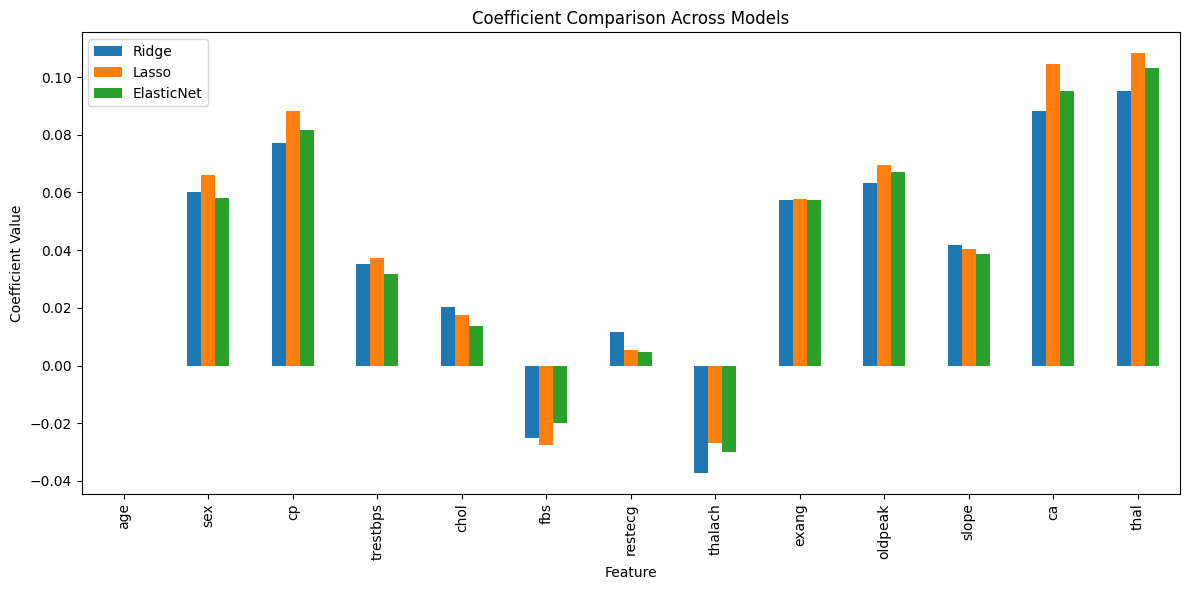

In [23]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_,
    'ElasticNet': elastic_cv.coef_
})

coef_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title("Coefficient Comparison Across Models")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()